In [12]:
import phate
import numpy as np
from scipy.spatial.distance import pdist, squareform, cdist
import matplotlib.pyplot as plt
import scprep
import sys
sys.path.append('../src/')
from mds import embed_MDS_dist_mat
import demap

In [13]:
# data = np.load('../data/eb_subset_all.npz')
data = np.load('../data_notebook/splatter.npz')

In [14]:
X = data['noisy']

In [15]:
phate_op = phate.PHATE(n_landmark=4000)
Y = phate_op.fit_transform(X)

Calculating PHATE...
  Running PHATE on 3000 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.21 seconds.
    Calculating affinities...
    Calculated affinities in 0.64 seconds.
  Calculated graph and diffusion operator in 1.87 seconds.
  Calculating optimal t...
    Automatically selected t = 12
  Calculated optimal t in 18.29 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 5.68 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 16.45 seconds.
Calculated PHATE in 42.35 seconds.


In [16]:
phate_op.diff_potential.shape

(3000, 3000)

In [17]:
phate_op.diff_op.shape

(3000, 3000)

In [18]:
diff_op_t = np.linalg.matrix_power(phate_op.diff_op, 12)

In [19]:
phate_potential = -1 * np.log(diff_op_t)

In [20]:
phate_dist = squareform(pdist(phate_potential))

In [21]:
diffu_dist = squareform(pdist(diff_op_t))

In [23]:
def compute_jsd(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (np.sum(p * np.log(p / m)) + np.sum(q * np.log(q / m)))
jsd_mat = np.zeros((len(diff_op_t), len(diff_op_t)))
for i in range(len(diff_op_t)):
    for j in range(i, len(diff_op_t)):
        jsd = compute_jsd(diff_op_t[i], diff_op_t[j])
        jsd_mat[i, j] = jsd
        jsd_mat[j, i] = jsd

In [24]:
jsdist = np.sqrt(jsd_mat)

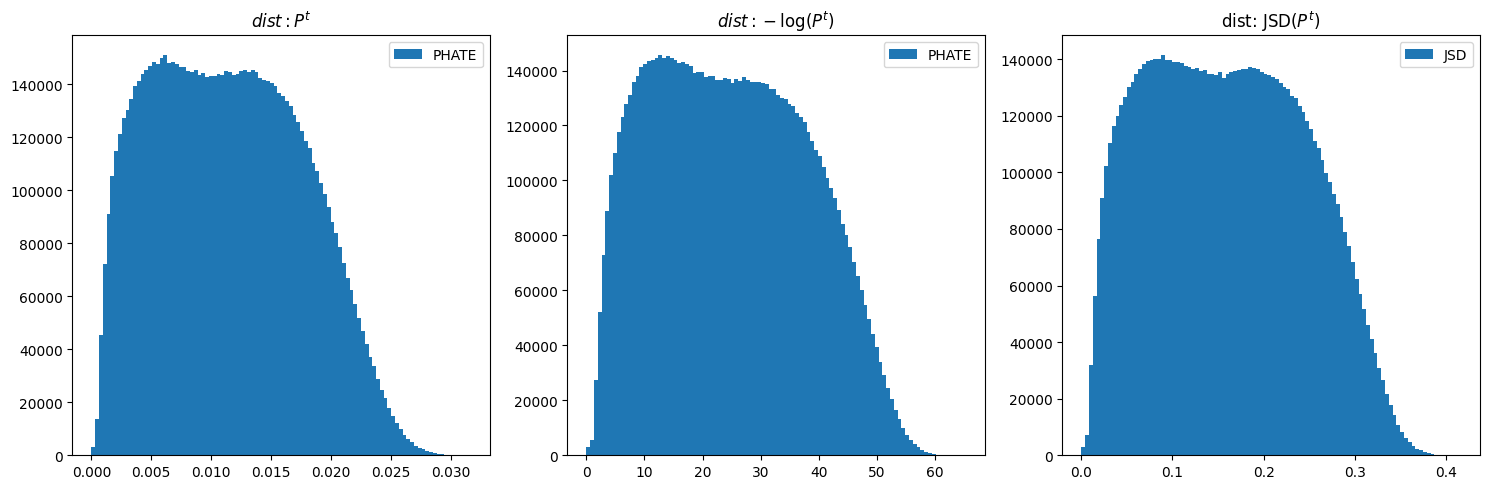

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[2].hist(jsdist.flatten(), bins=100, label='JSD')
axs[2].set_title('dist: JSD$(P^t)$')
axs[2].legend()

axs[1].hist(phate_dist.flatten(), bins=100, label='PHATE')
axs[1].set_title('$dist: -\\log(P^t)$')
axs[1].legend()

axs[0].hist(diffu_dist.flatten(), bins=100, label='PHATE')
axs[0].set_title('$dist: P^t$')
axs[0].legend()

plt.tight_layout()
plt.show()


In [26]:
phate_emb = embed_MDS_dist_mat(phate_dist)

In [27]:
js_emb = embed_MDS_dist_mat(jsdist)

In [28]:
# js_emb_inv = embed_MDS_dist_mat(jsdist)

In [29]:
diffu_emb = embed_MDS_dist_mat(diffu_dist)

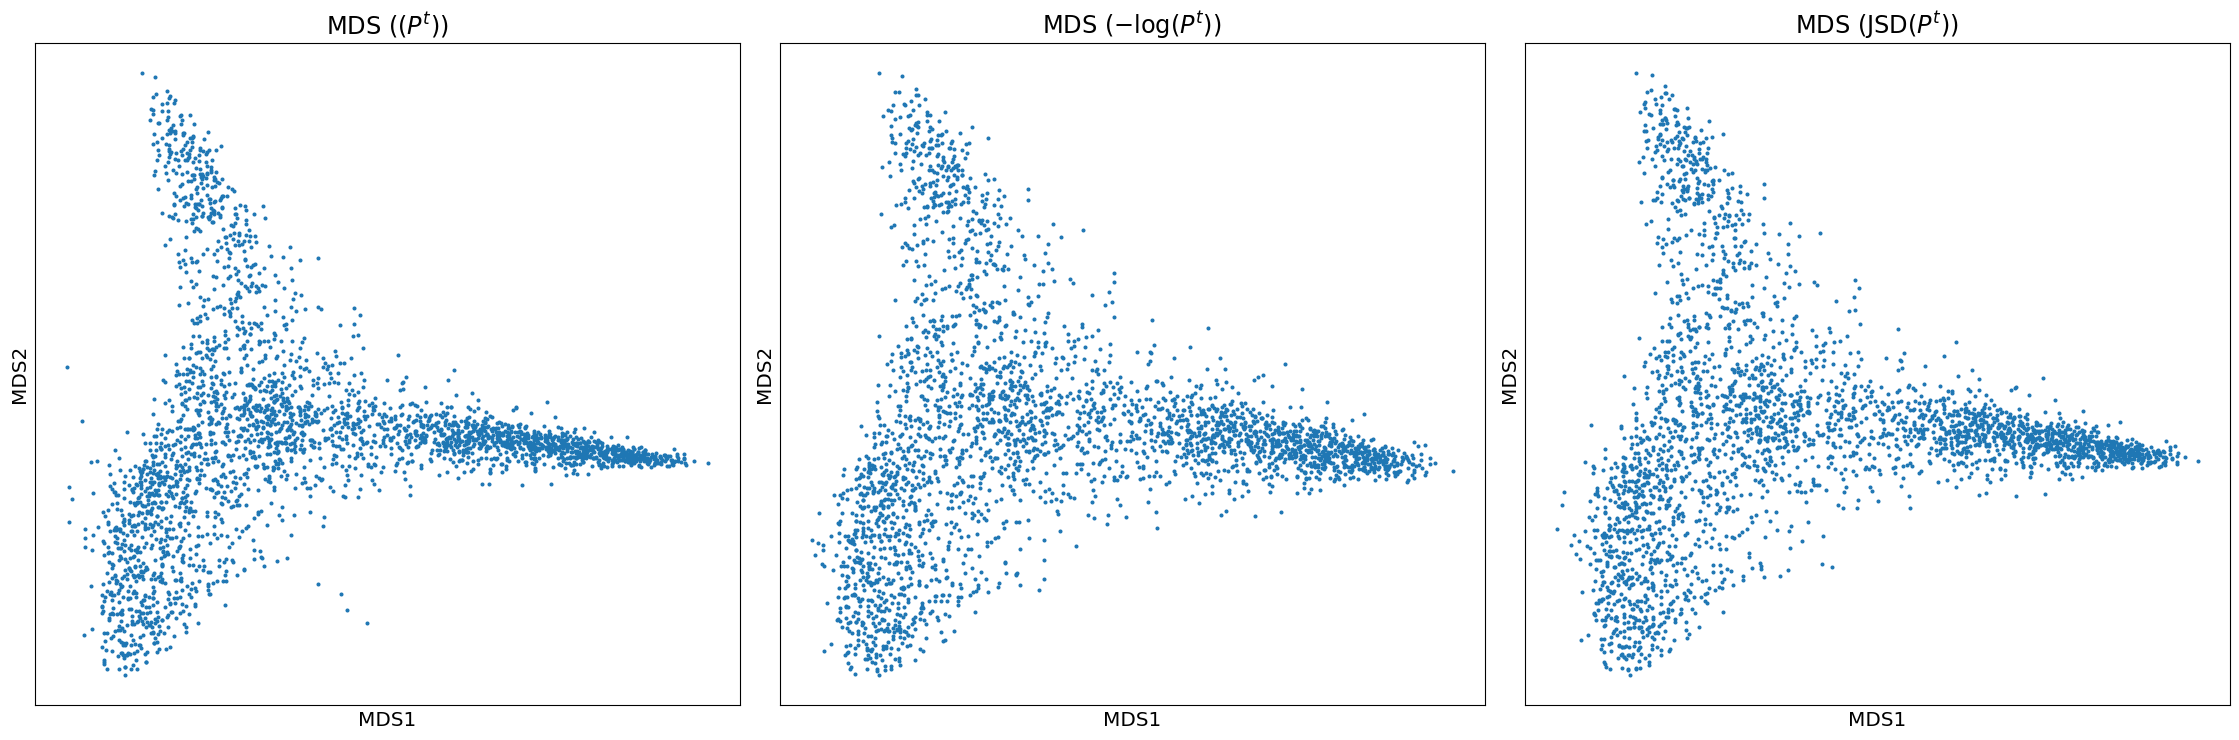

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(22.5, 7.5))

scprep.plot.scatter2d(phate_emb, label_prefix='MDS', title='MDS ($-\\log(P^t)$)', ax=axs[1], ticks=False)
scprep.plot.scatter2d(js_emb, label_prefix='MDS', title='MDS (JSD$(P^t)$)', ax=axs[2], ticks=False)
scprep.plot.scatter2d(diffu_emb, label_prefix='MDS', title='MDS ($(P^t)$)', ax=axs[0], ticks=False)

plt.tight_layout()
plt.show()


In [ ]:
phate_emb3 = embed_MDS_dist_mat(phate_dist, ndim=3)
js_emb3 = embed_MDS_dist_mat(jsdist, ndim=3)

: 

In [ ]:
diffu_emb3 = embed_MDS_dist_mat(diffu_dist, ndim=3)

: 

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(22.5, 7.5), subplot_kw={'projection': '3d'})

scprep.plot.scatter3d(phate_emb3, c=data['colors'], label_prefix='MDS', title='PHATE ($-\\log(P^t)$)', ax=axs[1], ticks=False)
scprep.plot.scatter3d(js_emb3, c=data['colors'], label_prefix='MDS', title='PHATE (JSD$(P^t)$)', ax=axs[2], ticks=False)
scprep.plot.scatter3d(diffu_emb3, c=data['colors'], label_prefix='MDS', title='PHATE ($(P^t)$)', ax=axs[0], ticks=False)

plt.tight_layout()
plt.show()

: 

In [ ]:
scprep.plot.rotate_scatter3d(diffu_emb3, c=data['colors'], label_prefix='MDS', title='PHATE ($(P^t)$)', ticks=False)

: 

In [ ]:
scprep.plot.rotate_scatter3d(phate_emb3, c=data['colors'], label_prefix='MDS', title='PHATE ($-\\log(P^t)$)', ticks=False)

: 

In [ ]:
scprep.plot.rotate_scatter3d(js_emb3, c=data['colors'], label_prefix='MDS', title='PHATE (JSD$(P^t)$)', ticks=False)


: 

: 